In [116]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [117]:
df = pd.read_excel(r"C:\Users\ldtes\precio_pan_deflactado.xlsx")
df=df.round(2)
df['Mes'] = df['Mes'].replace({
    "Enero":"January","Enero " :"January",
    'Febrero': 'February',"Marzo":"March",
    'Abril': 'April',"Mayo":"May","Junio":"June","Julio":"July","Agosto":"August",
    "Septiembre":"September","Octubre":"October","Noviembre":"November","Diciembre":"December"
})


In [132]:
df['month_number'] = pd.to_datetime(df['Mes'], format='%B').dt.month
df['month_year'] = df['month_number'].astype(str).str.zfill(2) + '/' + df["Año"].astype(str)
df['Precio deflactado'] = df['Precio deflactado'].replace({"-":38.64})
df["month_year"]=pd.to_datetime(df["month_year"], format="%m/%Y")
df["Precio deflactado"]=df["Precio deflactado"].round(2)
df

,Año,Mes,Pan francés(kg),IPC mensual,Índice IPC,IPC (base junio 2017 = 100),Precio deflactado,month_number,month_year,months_since_start,precio_1
0,2017,June,38.64,-,100.00,100,38.64,6,2017-06-01,0,38.64
1,2017,July,39.12,1.7,101.70,100,38.47,7,2017-07-01,1,38.47
2,2017,August,39.43,1.4,103.12,100,38.24,8,2017-08-01,2,38.24
3,2017,September,39.71,1.9,105.08,100,37.79,9,2017-09-01,3,37.79
4,2017,October,39.89,1.5,106.66,100,37.40,10,2017-10-01,4,37.40
...,...,...,...,...,...,...,...,...,...,...,...
89,2024,November,3040.97,2.4,6678.45,100,45.53,11,2024-11-01,89,45.53
90,2024,December,3095.49,2.7,6858.77,100,45.13,12,2024-12-01,90,45.13
91,2025,January,3154.17,2.2,7009.66,100,45.00,1,2025-01-01,91,45.00
92,2025,February,3212.93,2.4,7177.89,100,44.76,2,2025-02-01,92,44.76


Text(0.5, 1.0, 'Diciembre-Abril , 2017-2025')

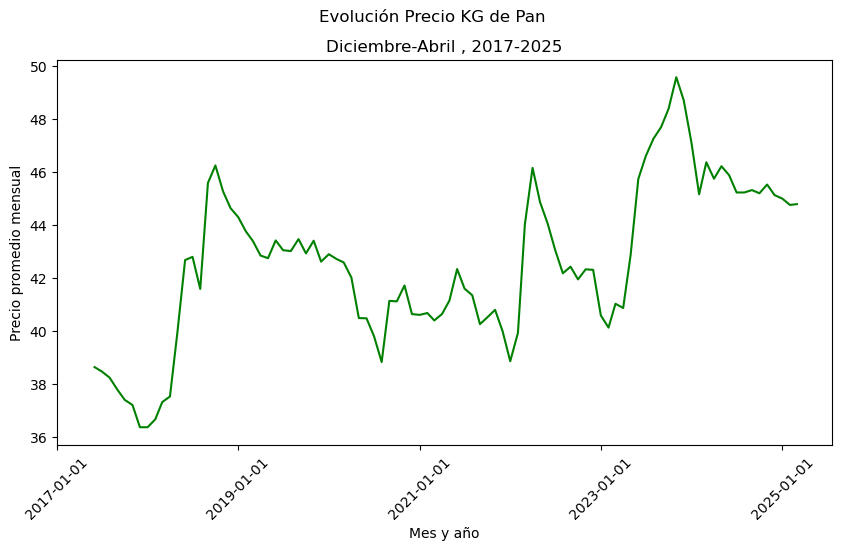

In [133]:
plt.figure(figsize=(10, 5))
plt.plot(df['month_year'], df["Precio deflactado"], linestyle='-', color='green')
plt.xticks(ticks=plt.xticks()[0][::2])
plt.xticks(rotation=45)
plt.suptitle('Evolución Precio KG de Pan')
plt.xlabel('Mes y año')
plt.ylabel('Precio promedio mensual')
plt.title('Diciembre-Abril , 2017-2025')


In [137]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
df["Precio deflactado"]

0     38.64
1     38.47
2     38.24
3     37.79
4     37.40
      ...  
89    45.53
90    45.13
91    45.00
92    44.76
93    44.79
Name: Precio deflactado, Length: 94, dtype: float64

In [203]:
df["precio_1"] = df["Precio deflactado"].shift(1, fill_value=0)
df["precio_2"] = df["Precio deflactado"].shift(2, fill_value=0)
df["precio_3"] = df["Precio deflactado"].shift(3, fill_value=0)
df["precio_4"] = df["Precio deflactado"].shift(4, fill_value=0)
df["precio_5"] = df["Precio deflactado"].shift(5, fill_value=0)
df['intercepto'] = 1
df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
df["Precio deflactado"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
x=df[["precio_1","precio_2","precio_3","precio_4","precio_5","intercepto"]]
y=df[["Precio deflactado"]]
model = sm.OLS(y,x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:      Precio deflactado   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     12.56
Date:                Fri, 30 May 2025   Prob (F-statistic):           3.28e-09
Time:                        20:21:11   Log-Likelihood:                -209.49
No. Observations:                  94   AIC:                             431.0
Df Residuals:                      88   BIC:                             446.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
precio_1       0.3088      0.076      4.079      0.0

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_129944\3492074664.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["precio_1"].replace([np.nan, np.inf, -np.inf], 0, inplace=True)
C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_129944\3492074664.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

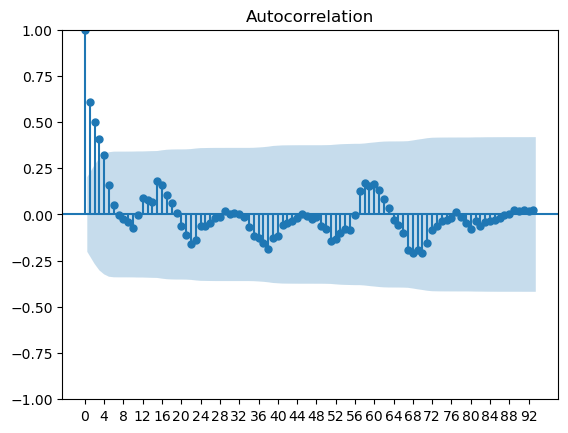

In [205]:
residuals = results.resid
fig, ax = plt.subplots()
plot_acf(residuals, lags=93,ax=ax) 
ax.set_xticks(range(0, 93, 4))
plt.show()

In [207]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(results.resid)
print("Durbin-Watson:", dw)

Durbin-Watson: 0.5439372762068879
